In [2]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import math

In [20]:
def plot(values, duration, y_label, y_lim=None, silent_frames=None):
    time = np.linspace(0, duration, len(values))

    # Set the figure size
    plt.figure(figsize=(20, 5))

    # Plot the amplitude over time
    if silent_frames is not None:
        # Plot silent frames in red
        plt.plot(time[silent_frames], values[silent_frames], 'r')
        # Plot non-silent frames in blue
        plt.plot(time[~silent_frames], values[~silent_frames], 'b')
    else:
        plt.plot(time, values)

    plt.xlabel('Time (ms)')
    plt.ylabel(str(y_label))

    if (y_lim != None):
        plt.ylim(y_lim)

    plt.show()

In [26]:
def plot2(values, duration, y_label, y_lim=None, silent_frames=None):
    time = np.linspace(0, duration, len(values))

    # Set the figure size
    plt.figure(figsize=(20, 5))

    # Plot the amplitude over time
    if silent_frames is not None:
        # Find the indices where silent frames start and end
        start_indices = np.where(np.diff(silent_frames.astype(int)) == 1)[0] + 1
        end_indices = np.where(np.diff(silent_frames.astype(int)) == -1)[0] + 1

        # If the first frame is silent, add the starting index as the first end index
        if silent_frames[0]:
            end_indices = np.insert(end_indices, 0, 0)

        # If the last frame is silent, add the last index as the last start index
        if silent_frames[-1]:
            start_indices = np.append(start_indices, len(silent_frames))

        # Plot the silent frames in red and the non-silent frames in blue
        for start, end in zip(start_indices, end_indices):
            if silent_frames[start]:
                plt.fill_between(time[start:end], values[start:end], color='red')
            else:
                plt.fill_between(time[start:end], values[start:end], color='blue')
    else:
        plt.plot(time, values)

    plt.xlabel('Time (ms)')
    plt.ylabel(str(y_label))

    if y_lim is not None:
        plt.ylim(y_lim)

    plt.show()


In [4]:
# Open the wav file
with wave.open('aba_1.wav', 'rb') as wav_file:
    # Get the sample rate and number of frames
    sample_rate = wav_file.getframerate()
    num_frames = wav_file.getnframes()

    # Set the duration of each frame in milliseconds
    frame_duration_ms = 20  # Change this to adjust the duration of each frame

    # Calculate the number of samples per frame
    frame_size = int(sample_rate * frame_duration_ms / 1000)

    # Split the audio into frames
    audio_frames = []
    for i in range(0, num_frames, frame_size):
        # Read the audio data for the current frame
        wav_file.setpos(i)
        frame_bytes = wav_file.readframes(frame_size)
        frame_samples = np.frombuffer(frame_bytes, dtype=np.int16)

        frame_samples = frame_samples / 32768.0

        # Append the frame to the list of audio frames
        audio_frames.append(frame_samples)

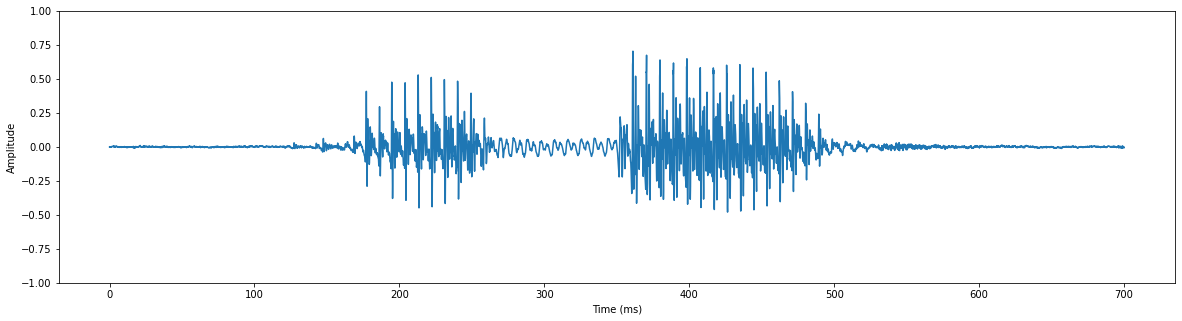

In [11]:
audio_samples = np.concatenate(audio_frames, axis=0)
duration = len(audio_frames) * frame_duration_ms

plot(audio_samples, duration, 'Amplitude', [-1, 1])

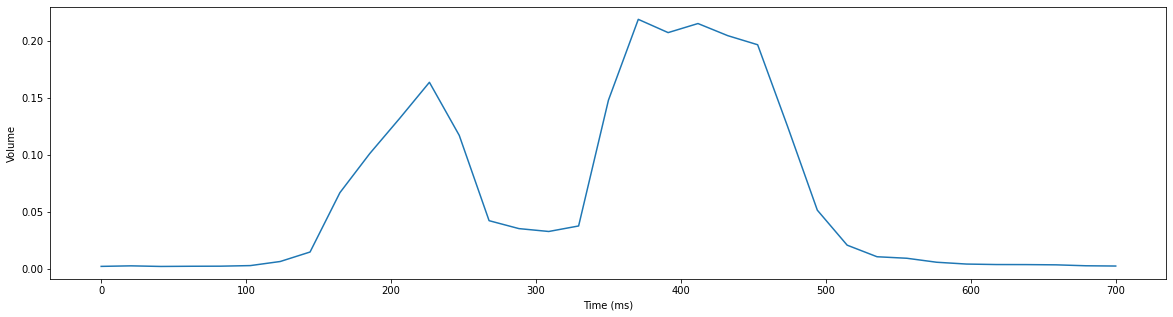

Volume average: 0.06307


In [6]:
volume_samples = []
frame_count = len(audio_frames[0])

for frame in audio_frames:
    sum = 0
    for sample in frame:
        sum += math.pow(sample, 2)
    volume_samples.append(np.sqrt(sum / frame_count))

plot(volume_samples, duration, 'Volume')
print(f'Volume average: {np.round(np.average(volume_samples), 5)}')

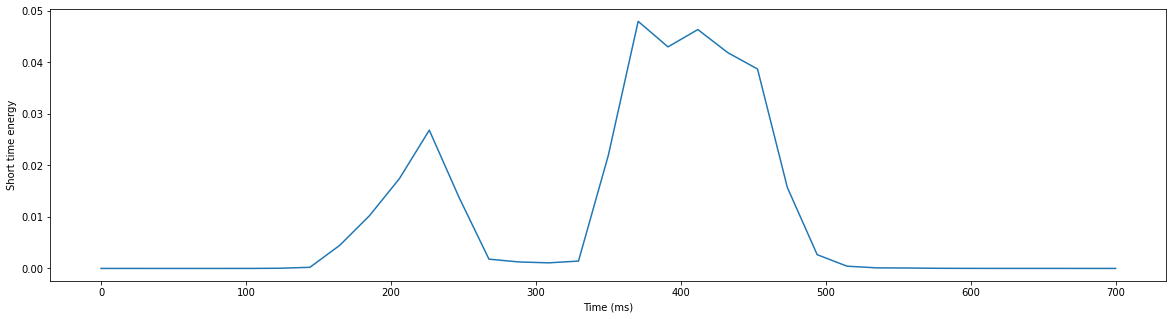

Short time energy average: 0.00965


In [7]:
short_time_energy = np.power(volume_samples, 2)

plot(short_time_energy, duration, 'Short time energy')
print(f'Short time energy average: {np.round(np.average(short_time_energy), 5)}')

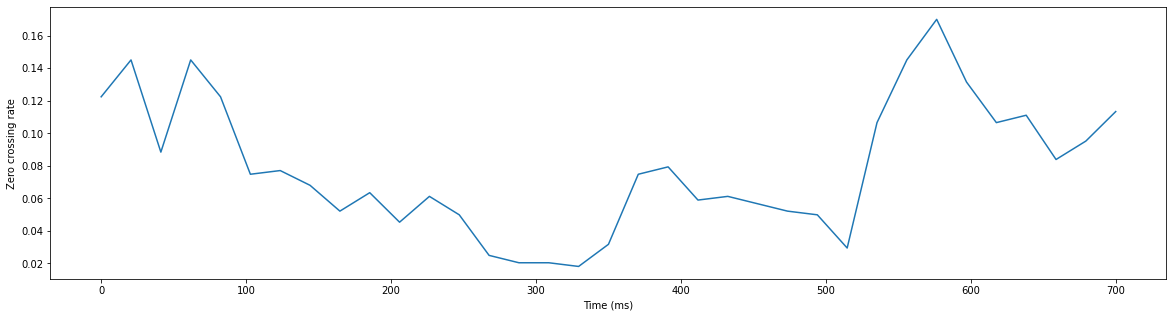

Short time energy average: 0.07878


In [8]:
zero_crossing_rate = []

for frame in audio_frames:
    sum = 0
    for i in range(1, len(frame)):
        sum += np.abs(np.sign(frame[i]) - np.sign(frame[i - 1]))
    sum = sum / (2 * frame_count)
    zero_crossing_rate.append(sum)

plot(zero_crossing_rate, duration, 'Zero crossing rate')
print(f'Short time energy average: {np.round(np.average(zero_crossing_rate), 5)}')

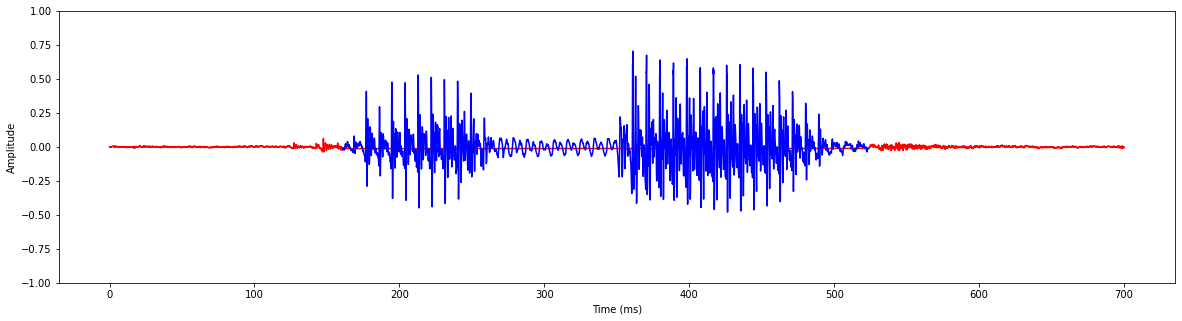

In [28]:
silent_frames = []
for i in range(len(audio_frames)):
    if (volume_samples[i] < 0.02 and zero_crossing_rate[i] <= 0.5):
        silent_frames.extend(np.repeat(True, len(audio_frames[i])))
    else:
        silent_frames.extend(np.repeat(False, len(audio_frames[i])))

plot(audio_samples, duration, 'Amplitude', [-1, 1], np.array(silent_frames))

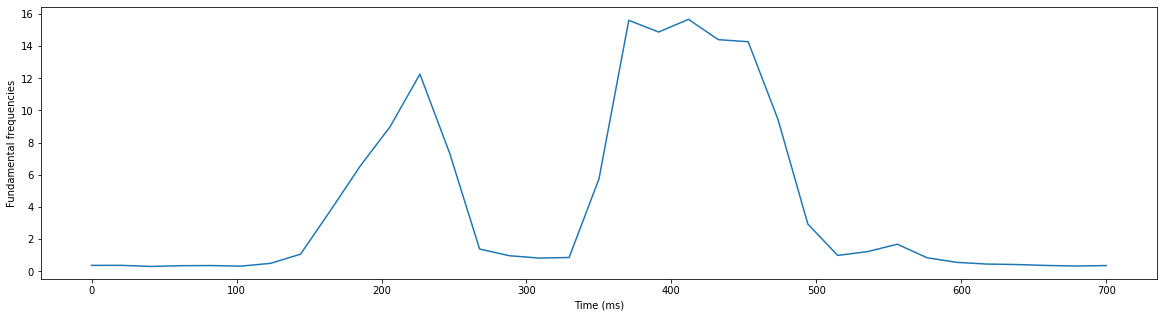

Fundamental frequency average: 4.19329


In [34]:
fundamental_frequencies = []
lag = 1

for frame in audio_frames:
    sum = 0
    for j in range(len(frame) - lag - 1):
        sum += np.abs(frame[j + lag] - frame[j])
    fundamental_frequencies.append(sum)

plot(fundamental_frequencies, duration, 'Fundamental frequencies')
print(f'Fundamental frequency average: {np.round(np.average(fundamental_frequencies), 5)}')